<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/kaggle_api_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the [Kaggle API](https://github.com/Kaggle/kaggle-api) in Colab

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Authenticating with Kaggle using kaggle.json

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


# Using the Kaggle API

For a more complete list of what you can do with the API, visit https://github.com/Kaggle/kaggle-api.

## Listing competitions

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         41           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        131           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        676           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        134           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1551           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14101           False  
house-pr

## Downloading a dataset

In [ ]:
!kaggle datasets download "kartik2112/fraud-detection"

 97% 195M/202M [00:01<00:00, 130MB/s]
100% 202M/202M [00:01<00:00, 121MB/s]


In [ ]:
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


In [ ]:
import pandas as pd 

train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [ ]:
#Concatenate the splitted data
df = pd.concat([train,test],ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#Shape of the data (rows,columns)
df.shape

(1852394, 22)

In [ ]:
#Finding dtypes and other basic info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt###
                               ### Visualisation tools
import seaborn as sns          ###

from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor , Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [ ]:
#dividing data into categorical and numerical
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')
le = LabelEncoder()

In [ ]:
df['gender_le']  = le.fit_transform(df['gender'])

In [ ]:
# Seperating  numerical from nominal
# cutting off some data to avoid heavy cpu usage
df2 = df.select_dtypes(exclude = 'object')
#df2 = df2.loc[:149999]

In [ ]:
# dropping the feature which is not useful for data analysis
df2 = df2.drop(['cc_num'],axis=1)
# seperating target and independent features
x = df2.drop('is_fraud',axis=1)
y = df2['is_fraud']

In [ ]:
df_num = df_num.drop(['cc_num','zip'],axis=1)
df_num = df_num.drop('is_fraud',axis=1)

In [ ]:
df_num.columns

Index(['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long'],
      dtype='object')

In [ ]:
x.shape

(1852394, 9)

In [ ]:
train_x = x[0:300000]
train_y = 1-y[0:300000]


In [ ]:
train_x

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_le
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,1
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,1
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,1
...,...,...,...,...,...,...,...,...,...
299995,96.03,25106,38.8265,-82.1364,642,1338048681,39.298162,-82.030474,0
299996,59.77,63021,38.5770,-90.5255,92608,1338048685,39.339959,-89.859340,1
299997,77.82,73754,36.3850,-98.0727,1078,1338048717,36.545200,-98.854027,1
299998,53.20,27522,36.1124,-78.6476,12335,1338048723,36.078714,-78.024839,0


In [ ]:
# Scaling the data
ss = StandardScaler()
train_x[df_num.columns] = ss.fit_transform(train_x[df_num.columns])


In [ ]:
train_y.value_counts()

1    297745
0      2255
Name: is_fraud, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import random

In [ ]:

epochs = 500

model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_x.shape[1],)),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

opt = optimizers.Adam(learning_rate=0.0000001)
model_c.compile(optimizer=opt,
            loss='binary_crossentropy',
            metrics=['acc'])
print(model_c.summary())
#hist = model_c.fit(dx, metric_c[:,0], validation_split=0.2, batch_size=400, epochs=epochs,shuffle=False,verbose=0,callbacks=[early_stop,VerboseCallback(epochs)]) #, callbacks=[es_callback])
hist = model_c.fit(train_x, train_y, validation_split=0.2, 
                   batch_size=5000, epochs=epochs,shuffle=False,use_multiprocessing=False,
                   verbose=1, callbacks=[early_stop])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1280      
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
48/48 [==============================] - 1s 7ms/step - loss: 2173361.0000 - acc: 0.9922 - val_loss: 1742507.8750 - val_acc: 0.9937
Epoch 2/500
48/48 [==============================] - 0s 4ms/step - loss: 2172709.7500 - acc: 0.9922 - val_loss: 1741974.5000 - val_acc: 0.9937
Epoch 3/500
48/48 [==============================] - 0s 4ms/step - loss: 2172040.5000 - acc: 0.9922 - val_loss: 1741432.8750 - val_acc: 0.9937
Epoch 4/500
48

KeyboardInterrupt: ignored

In [ ]:
#Naive Bayes model
nb =GaussianNB()
model_c = nb.fit(train_x, train_y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_c = RandomForestClassifier(n_estimators=120,max_depth=20)
model_c.fit(train_x,train_y)

RandomForestClassifier(max_depth=20, n_estimators=120)

In [ ]:
test_x = x[300000:310000]
test_y = 1-y[300000:310000]
test_x[df_num.columns] = ss.fit_transform(test_x[df_num.columns])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

pedict_y = model_c.predict(test_x)
#ppy = [1 if py > 0.5 else 0 for py in pedict_y[:,0]]     
ppy = [0 if py > 0.5 else 1 for py in pedict_y]              
acc = precision_recall_fscore_support(test_y.values,np.asarray(ppy),average='binary')

acc

(0.9961, 1.0, 0.9980461900706378, None)

In [ ]:
ppy

In [ ]:
print(classification_report(test_y,ppy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       1.00      1.00      1.00      9961

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      1.00      0.99     10000



In [ ]:
import math
f1s = []
batch_size = 10000
batch = math.ceil(x[300000:-1].shape[0]/batch_size)
for i in range(batch):
    ux = x[300000:-1][i*batch_size:(i+1)*batch_size]
    ux[df_num.columns] = ss.fit_transform(ux[df_num.columns])
    uy = 1-y[300000:-1][i*batch_size:(i+1)*batch_size]
    predict_y = model_c.predict(ux)
    ppy = [0 if py > 0.5 else 1 for py in predict_y]       
    f1 = precision_recall_fscore_support(uy, np.asarray(ppy),average='binary')
    print("f1:",f1[2])
    f1s.append(f1[2])

f1: 0.9980461900706378
f1: 0.99964987745711
f1: 0.9970915655400662
f1: 0.9994496973335335
f1: 0.9977951493285228
f1: 0.9976444644915552
f1: 0.9980963831279431
f1: 0.9976444644915552
f1: 0.9986481750362989
f1: 0.9959335307997389
f1: 0.99849774661993
f1: 0.9975942261427425
f1: 0.9973932223781832
f1: 0.9981967541574834
f1: 0.9993996397838703
f1: 0.9987484355444306
f1: 0.9978453675402115
f1: 0.9963869931754317
f1: 0.9991993594875901
f1: 0.9973429588409285
f1: 0.9988987886675343
f1: 0.997895580719511
f1: 0.9981967541574834
f1: 0.9971418542847114
f1: 0.9993996397838703
f1: 0.9968903601163607
f1: 0.9978453675402115
f1: 0.9960343356257216
f1: 0.9981967541574834
f1: 0.9955805544395339
f1: 0.9963869931754317
f1: 0.9973932223781832
f1: 0.9963366286947357
f1: 0.9973429588409285
f1: 0.9968903601163607
f1: 0.9973932223781832
f1: 0.9964877069744105
f1: 0.9961351202128194
f1: 0.9944190255920358
f1: 0.9980963831279431
f1: 0.9982469321312296
f1: 0.9954796584630838
f1: 0.998547894446948
f1: 0.99764446449

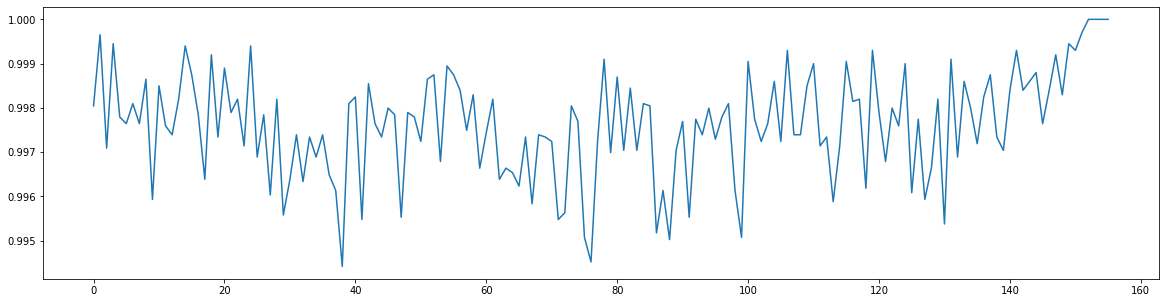

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(f1s)

# 다른거....

In [3]:
!kaggle datasets download "ealtman2019/credit-card-transactions"


 95% 250M/263M [00:02<00:00, 104MB/s]
100% 263M/263M [00:02<00:00, 111MB/s]


In [4]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [5]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


In [7]:
df.head() 

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [8]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

In [9]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1}) 

In [11]:
df.isnull().sum() 

User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Time                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State     2720821
Zip                2878135
MCC                      0
Errors?           23998469
Is Fraud?                0
dtype: int64

In [12]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

True     23998469
False      388431
Name: Errors?, dtype: int64

In [13]:
df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

In [14]:
from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())  
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)     
df['Merchant State']=df['Merchant State'].fillna('NAN')    
df['Merchant City']=df['Merchant City'].fillna('NAN') 
df['is vozmes']=df['Amount'].apply(lambda value: value<0)  
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

In [15]:
#encoding categorial features
le=LabelEncoder() 
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])

In [16]:
y=df['Is Fraud?'] 
df.drop('Is Fraud?',axis=1,inplace=True)
X=df

In [17]:
random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

In [19]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.7 MB/s 


In [ ]:
#cat boost classifier

from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train, y_train,plot=True) 
y_pred=cat.predict(X_test)   
print(classification_report(y_test, y_pred))    

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.5
0:	learn: 0.0348157	total: 1.81s	remaining: 30m 12s
1:	learn: 0.0100271	total: 3.37s	remaining: 28m 1s
2:	learn: 0.0069894	total: 4.93s	remaining: 27m 17s
3:	learn: 0.0059423	total: 6.5s	remaining: 26m 57s
4:	learn: 0.0053043	total: 8.28s	remaining: 27m 26s
5:	learn: 0.0049952	total: 9.77s	remaining: 26m 58s
6:	learn: 0.0047951	total: 11.4s	remaining: 27m 2s
7:	learn: 0.0045044	total: 12.9s	remaining: 26m 37s
8:	learn: 0.0043760	total: 14.4s	remaining: 26m 31s
9:	learn: 0.0042269	total: 15.9s	remaining: 26m 12s
10:	learn: 0.0041850	total: 17.4s	remaining: 26m 8s
11:	learn: 0.0037955	total: 19s	remaining: 26m 4s
12:	learn: 0.0036762	total: 20.6s	remaining: 26m 6s
13:	learn: 0.0036094	total: 22.3s	remaining: 26m 9s
14:	learn: 0.0035534	total: 23.9s	remaining: 26m 9s
15:	learn: 0.0034793	total: 25.5s	remaining: 26m 7s
16:	learn: 0.0034358	total: 27.1s	remaining: 26m 5s
17:	learn: 0.0033566	total: 28.6s	remaining: 26m 2s
18:	learn: 0.0030931	total: 30.2s	remaining:

### Change datatypes
Inorder to use the categorical feature attrribute in LightGBM, the object types need to be converted to the category datatype.

In [ ]:
for col in df.columns:
    col_type = df[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        df[col] = df[col].astype('category')

In [ ]:
y = df['Is Fraud?']
X = df.drop(['Is Fraud?','Year','Zip','Merchant City','Merchant Name'],axis=1)

In [ ]:
X

,User,Card,Month,Day,Time,Amount,Use Chip,Merchant State,MCC,Errors?
0,0,0,9,1,06:21,$134.09,Swipe Transaction,CA,5300,NaN
1,0,0,9,1,06:42,$38.48,Swipe Transaction,CA,5411,NaN
2,0,0,9,2,06:22,$120.34,Swipe Transaction,CA,5411,NaN
3,0,0,9,2,17:45,$128.95,Swipe Transaction,CA,5651,NaN
4,0,0,9,3,06:23,$104.71,Swipe Transaction,CA,5912,NaN
...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2,27,22:23,$-54.00,Chip Transaction,NH,5541,NaN
24386896,1999,1,2,27,22:24,$54.00,Chip Transaction,NH,5541,NaN
24386897,1999,1,2,28,07:43,$59.15,Chip Transaction,NH,4121,NaN
24386898,1999,1,2,28,20:10,$43.12,Chip Transaction,NH,4121,NaN


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

In [ ]:
# Undersampling the normal transactions data
from imblearn.under_sampling import RandomUnderSampler

# Reducing the majority class equal to minority class 
rus = RandomUnderSampler(sampling_strategy=1)

X_res, Y_res = rus.fit_resample(X_train, y_train)

print(X_res.shape, Y_res.shape)
print(pd.value_counts(Y_res))

(41660, 10) (41660,)
No     20830
Yes    20830
Name: Is Fraud?, dtype: int64


###Train a LightGBM Model
Initialize and train a model

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_res, Y_res, feature_name='auto', categorical_feature = 'auto', verbose=50)

LGBMClassifier()

In [ ]:
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      0.94      0.97   7307143
         Yes       0.02      0.89      0.03      8927

    accuracy                           0.94   7316070
   macro avg       0.51      0.91      0.50   7316070
weighted avg       1.00      0.94      0.97   7316070



In [ ]:
X_train = df[df['Year']==2007].drop(['Is Fraud?'],axis=1)
y_train = df[df['Year']==2007]['Is Fraud?']

In [ ]:
y_train.value_counts()

No     1062602
Yes       1881
Name: Is Fraud?, dtype: int64

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train, feature_name='auto', categorical_feature = 'auto', verbose=50)

LGBMClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=120,max_depth=20)
model.fit(train_x,train_y)

In [ ]:
X_test = df[df['Year']==2008].drop(['Is Fraud?'],axis=1)
y_test = df[df['Year']==2008]['Is Fraud?']

In [ ]:
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00   1219750
         Yes       0.38      0.37      0.38      3710

    accuracy                           1.00   1223460
   macro avg       0.69      0.69      0.69   1223460
weighted avg       1.00      1.00      1.00   1223460



In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

f1 = precision_recall_fscore_support([1 if m=='No' else 0 for m in y_test], [1 if m=='No' else 0 for m in y_pred],average='binary')
f1

(0.998097280529384, 0.9981651977864316, 0.9981312380025603, None)

In [ ]:
X_test = df[df['Year'] >= 2008].drop(['Is Fraud?'],axis=1)
y_test = df[df['Year'] >= 2008]['Is Fraud?']

In [ ]:
y_test.value_counts()

No     19465631
Yes       24836
Name: Is Fraud?, dtype: int64

In [ ]:
import math
f1s = []
batch_size = 200000
batch = math.ceil(X_test.shape[0]/batch_size)
for i in range(batch):
    ux = X_test[i*batch_size:(i+1)*batch_size]
    uy = y_test[i*batch_size:(i+1)*batch_size]
    y_pred=model.predict(ux)
    ppy = [1 if m=='No' else 0 for m in y_pred]   
    f1 = precision_recall_fscore_support([1 if m=='No' else 0 for m in uy], ppy,average='binary')
    print("p:",f1[2],uy.value_counts())
    f1s.append(f1[2])

p: 0.9682434334382675 No     199745
Yes       255
Name: Is Fraud?, dtype: int64
p: 0.9685271273808572 No     199773
Yes       227
Name: Is Fraud?, dtype: int64
p: 0.9684692592057166 No     199761
Yes       239
Name: Is Fraud?, dtype: int64
p: 0.9683741510120737 No     199774
Yes       226
Name: Is Fraud?, dtype: int64
p: 0.9683174503177033 No     199759
Yes       241
Name: Is Fraud?, dtype: int64
p: 0.9686654690371471 No     199750
Yes       250
Name: Is Fraud?, dtype: int64
p: 0.9679658867558066 No     199760
Yes       240
Name: Is Fraud?, dtype: int64
p: 0.9682117495158167 No     199757
Yes       243
Name: Is Fraud?, dtype: int64
p: 0.9682860963809387 No     199783
Yes       217
Name: Is Fraud?, dtype: int64
p: 0.9689770237453127 No     199722
Yes       278
Name: Is Fraud?, dtype: int64
p: 0.9681631303844803 No     199749
Yes       251
Name: Is Fraud?, dtype: int64
p: 0.9683967549870643 No     199739
Yes       261
Name: Is Fraud?, dtype: int64
p: 0.968679737212334 No     199727
Yes  

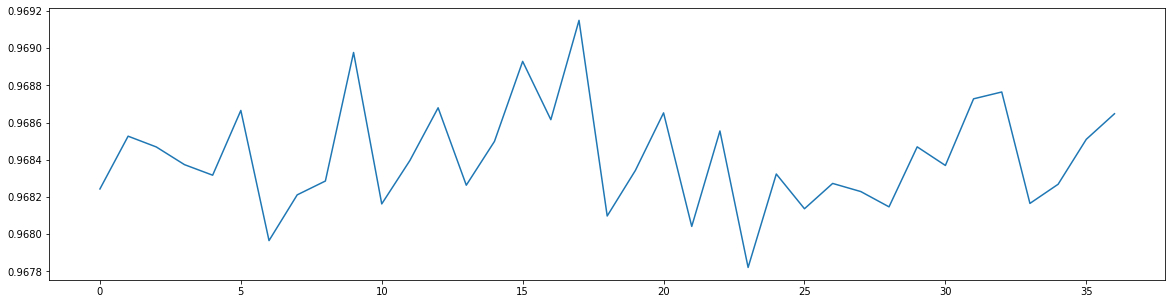

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(f1s)